We wish to estimate the representativity of our segmented (3-phase) microstructure with the model. First we load the .tiff file, then we must select which phase to analyse and convert our segmentation into a binary microstructure

In [1]:
import numpy as np

np.random.seed(0)
from tifffile import imread
import matplotlib.pyplot as plt

import representativity.core as model

DEFAULT_MICROSTRUCTURE = imread("tests/resources/default.tiff")[0]
phases = np.unique(DEFAULT_MICROSTRUCTURE)
SELECTED_PHASE = phases[0]
DEFAULT_BINARY_IMG = np.where(DEFAULT_MICROSTRUCTURE == SELECTED_PHASE, 1, 0)

In [2]:
image_phase_fraction = np.mean(DEFAULT_BINARY_IMG)

In [3]:
text = f"Our binary microstructure has a (measured) image phase fraction Φ(ω) of {image_phase_fraction:.3f}"
print(text)

Our binary microstructure has a (measured) image phase fraction Φ(ω) of 0.418


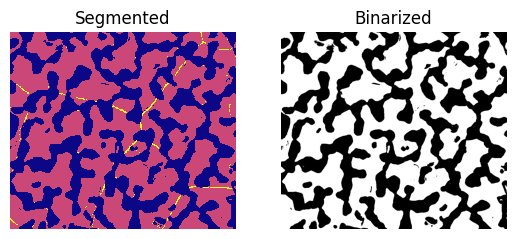

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(DEFAULT_MICROSTRUCTURE, cmap='plasma', interpolation='None')
axs[1].imshow(DEFAULT_BINARY_IMG, cmap='binary')
titles = ["Segmented", 'Binarized']
for i, ax in enumerate(axs):
    ax.set_axis_off()
    ax.set_title(titles[i])

Representativity is defined as:
> A microstructure is $(c, d)$-property representative if the measured value of the microstructural property deviates by no more than $d\%$ from the bulk material property, with at least $c\%$ confidence. For example, if $(c,d)=(95,3)$, and the property is phase-fraction, this means we can be $95\%$ confident that the measured phase-fraction is within $3\%$ of the bulk material phase-fraction. 

Here we specify $c$ = `desired_confidence` = $0.95$ and $d$ = `desired_uncertainty` = $0.05$. This means we desire less than a $5\%$ deviation from our measured image phase fraction Φ(ω) and call the model.

In [5]:
desired_confidence, desired_uncertainty = 0.95, 0.05

result = model.make_error_prediction(
    DEFAULT_BINARY_IMG, desired_confidence, desired_uncertainty
)
percent_err = result["percent_err"]
print(f"Estimated Phase Fraction uncertainty of {percent_err:.3f} < user target of {desired_uncertainty:.2f}. Good job!")
abs_err = result["abs_err"]
bounds = (image_phase_fraction - abs_err, image_phase_fraction + abs_err)
print(f"This corresponds to {bounds[0]:.3f} < material phase fraction < {bounds[1]:.3f} with {(desired_confidence * 100)}% probability.")

Estimated Phase Fraction uncertainty of 0.042 < user target of 0.05. Good job!
This corresponds to 0.400 < material phase fraction < 0.435 with 95.0% probability.


We can reuse these results to find the phase fraction bounds at a lower confidence, or to calculate the length needed to reach a lower uncertainty, i.e, $1\%$

In [11]:
lower_confidence = 0.80
lower_conf_bounds = model.get_bounds_for_targets_from_result(result, lower_confidence)
print(f"{lower_conf_bounds[0]:.3f} < material phase fraction < {lower_conf_bounds[1]:.3f} with {(lower_confidence * 100)}% probability.")

lower_uncertainty = 0.01
target_l = model.get_l_for_target_from_result(DEFAULT_BINARY_IMG, result, 0.95, lower_uncertainty)
print(f"Need to measure an image size {int(target_l)}x{int(target_l)} for {lower_uncertainty * 100}% uncertainty.")

0.407 < material phase fraction < 0.429 with 80.0% probability.
Need to measure an image size 3979x3979 for 1.0% uncertainty.
